In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('SalesData.csv')

In [ ]:
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


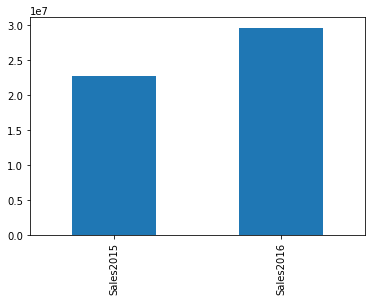

In [ ]:
#1)
data[['Sales2015','Sales2016']].sum().plot(kind = 'bar')
plt.show()

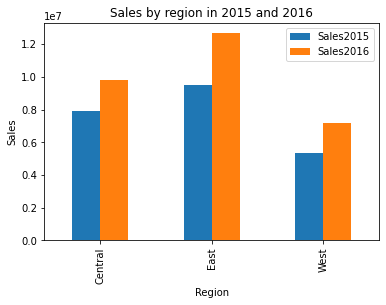

In [ ]:
#1)
data.groupby(by=['Region']).sum()[['Sales2015','Sales2016']].plot(kind='bar',ylabel = 'Sales',title = 'Sales by region in 2015 and 2016')

plt.show()

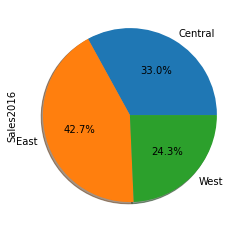

In [ ]:
#2)
data.groupby(by='Region')['Sales2016'].sum().plot(kind= 'pie', autopct='%1.1f%%',shadow=True)
plt.show()


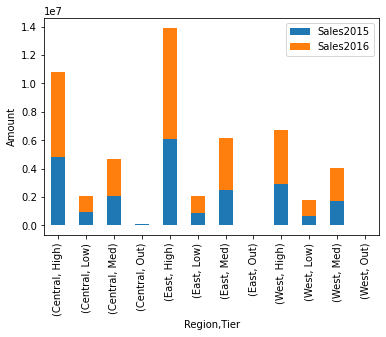

In [ ]:
#3)Compare the total sales of 2015 and 2016 with respect to Region and Tiers
data.groupby(by=['Region','Tier']).sum()[['Sales2015','Sales2016']].plot(kind='bar',stacked=True,ylabel='Amount')
plt.show()


NY reegisterd a decline in 2016 as compared to 2015


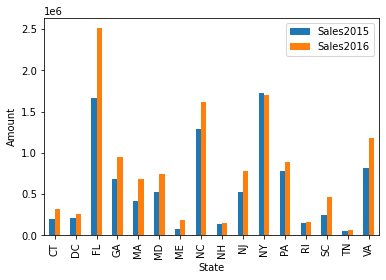

In [ ]:
#4)  In East region, which state registered a decline in 2016 as compared to 2015?
a=data[data['Region']=='East'][['State','Sales2015','Sales2016']].groupby(by='State').sum()
a.plot(kind='bar',ylabel='Amount')

print('NY reegisterd a decline in 2016 as compared to 2015')
plt.show()


No divison saw a decline in number of units sold in 2016 as compared to 2015


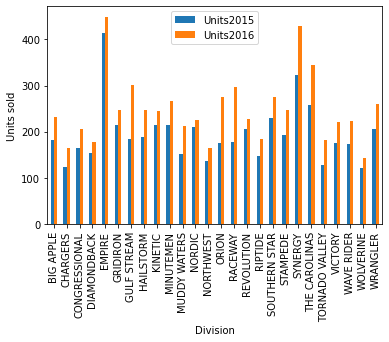

In [ ]:
#5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?
b=data[data['Tier']=='High'][['Division','Units2015','Units2016']].groupby(by='Division').sum()
b.plot(kind= 'bar', ylabel='Units sold')

print('No divison saw a decline in number of units sold in 2016 as compared to 2015')
plt.show()

In [ ]:
"""6. Create a new column Qtr using numpy.where() or any suitable utility in the imported
dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4 """


q1=['Jan','Feb','Mar']
q2=['Apr','May','Jun']
q3=['July','Aug','Sep']
q4=['Oct','Nov','Dec']

data['Quarter']= np.where(data.Month.isin(q1),'Qtr1',
np.where(data.Month.isin(q2),'Qtr2',
np.where(data.Month.isin(q3),'Qtr3','Qtr4' )))

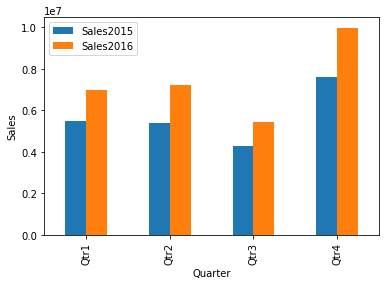

In [ ]:
# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot
data.groupby(by='Quarter').sum()[['Sales2015','Sales2016']].plot(kind='bar',ylabel='Sales')
plt.show()

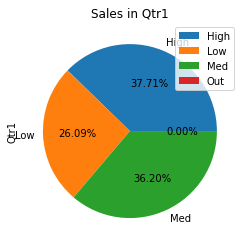

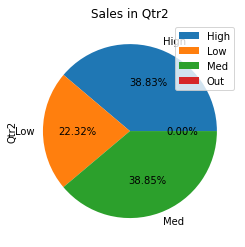

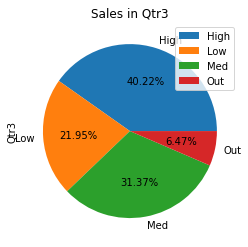

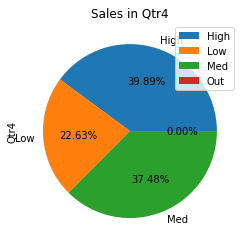

In [ ]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
c=data.pivot_table(index='Quarter',columns='Tier',values='Sales2016').abs()
#c.drop([('Sales2016',  'Out')])
for i in c.index:
    c.loc[i,:].to_frame().plot(kind='pie',y=i,autopct="%.2f%%",title=("Sales in "+i))
plt.show()